1. Generate the data (marks out of 100; obtained by 1000 students) and model the data distribution as shown below. Plot the histogram of the data and the Gaussian Fit. 

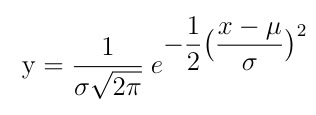

data_x : Shape : (1000, 1)
data_x : Mean  : 49.57646214149565
data_x : Std   : 9.967771847113125




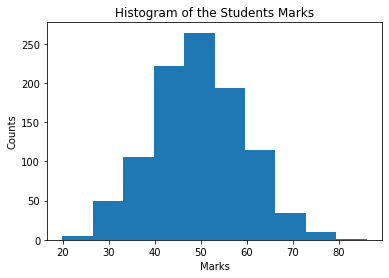

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

data_x = np.random.randn(1000,1)*10+50

print("data_x : Shape :", data_x.shape); print("data_x : Mean  :", data_x.mean()); print("data_x : Std   :", data_x.std())
print("\n")

_ = plt.hist(data_x); plt.title("Histogram of the Students Marks"); plt.xlabel('Marks');plt.ylabel('Counts');plt.show()

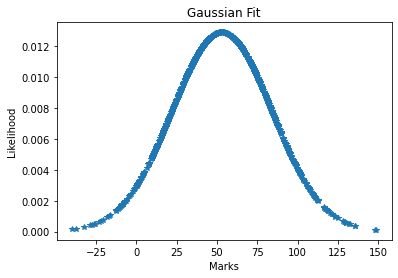

In [ ]:
# Make the indenpendent Variable

x = (data_x - data_x.mean())/data_x.std()

# Make the dependent Variable

y = 1/np.sqrt(2*np.pi*(data_x.std()**2)) * np.exp(-0.5*(x**2)) # expression

plt.plot(data_x, y, '*'); plt.title("Gaussian Fit"); 

plt.xlabel('Marks'); plt.ylabel('Likelihood'); plt.show()


2. Polynomial curve fitting using least squares for the data points (x, y). Note that we have modelled 'y' in part 1 of the question. Use the first 750 data points to regress the coefficient vector [β0 β1 β2 ... βn] and validate your obtained fit on the remaining held out 250 data points. The polynomial fit can be modelled as :

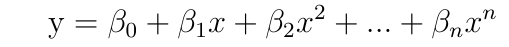

In [ ]:
x_train = x[0:750]
y_train = y[0:750]

print("x_train : shape : ", x_train.shape)
print("y_train : shape : ", y_train.shape)

x_test = x[750:1001]
y_test = y[750:1001]

print("x_test  : shape : ", x_test.shape)
print("y_test  : shape : ", y_test.shape)

x_train : shape :  (750, 1)
y_train : shape :  (750, 1)
x_test  : shape :  (250, 1)
y_test  : shape :  (250, 1)


In [ ]:
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class myDataset(Dataset):
  
    def __init__(self, x, y):
        self.X = x
        self.Y = y
                 
    def __len__(self):
        return (len(self.X))
    
    def __getitem__(self, i):
        datax = self.X[i]
        datay = self.Y[i]                     
        return torch.tensor(datax), torch.tensor(datay)

In [ ]:
import numpy as np

from torch.utils.data import DataLoader

training_data   = myDataset(x_train,y_train)

training_loader = DataLoader(training_data, 
                batch_size=100, shuffle=True)

for i, data in enumerate(training_loader):
  print(data[0].shape, data[1].shape)

torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([100, 1]) torch.Size([100, 1])
torch.Size([50, 1]) torch.Size([50, 1])


Epoch :  1  Iteration :  1
Epoch :  1  Iteration :  2
Epoch :  1  Iteration :  3
Epoch :  1  Iteration :  4
Epoch :  1  Iteration :  5
Epoch :  1  Iteration :  6
Epoch :  1  Iteration :  7
Epoch :  1  Iteration :  8
Epoch :  1  Iteration :  9
Epoch :  1  Iteration :  10
Epoch :  1  Iteration :  11
Epoch :  1  Iteration :  12
Epoch :  1  Iteration :  13
Epoch :  1  Iteration :  14
Epoch :  1  Iteration :  15
Training - Epoch 1/50, loss:100.569 
-------------------------------------------------------------------
Epoch :  2  Iteration :  1
Epoch :  2  Iteration :  2
Epoch :  2  Iteration :  3
Epoch :  2  Iteration :  4
Epoch :  2  Iteration :  5
Epoch :  2  Iteration :  6
Epoch :  2  Iteration :  7
Epoch :  2  Iteration :  8
Epoch :  2  Iteration :  9
Epoch :  2  Iteration :  10
Epoch :  2  Iteration :  11
Epoch :  2  Iteration :  12
Epoch :  2  Iteration :  13
Epoch :  2  Iteration :  14
Epoch :  2  Iteration :  15
Training - Epoch 2/50, loss:11.962 
-------------------------------------

Text(0, 0.5, 'Loss')

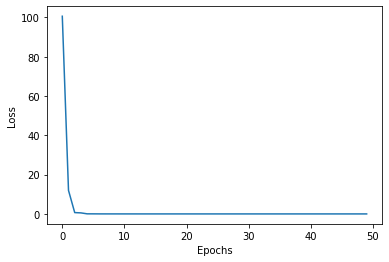

In [ ]:
import torch.optim as optim

# Let us fit a fourth degree polynomial

beta_0 = torch.nn.Parameter(torch.tensor(1.0), requires_grad = True)
beta_1 = torch.nn.Parameter(torch.tensor(1.0), requires_grad = True)
beta_2 = torch.nn.Parameter(torch.tensor(1.0), requires_grad = True)
beta_3 = torch.nn.Parameter(torch.tensor(1.0), requires_grad = True)
beta_4 = torch.nn.Parameter(torch.tensor(1.0), requires_grad = True) # intialized our parameters of interest

optimizer = optim.Adam([beta_0,beta_1,beta_2,beta_3,beta_4], lr=0.05) # defining the optimizer

epochs = 50
batch  = 50

from torch.utils.data import DataLoader

training_data   = myDataset(x_train,y_train)

training_loader = DataLoader(training_data, batch_size=batch, shuffle=True)

import torch.nn as nn

criterion = nn.MSELoss() # loss function # Q == 0 # compare model predictions with original y_train values

loss = []

for j in range(epochs):

  ##--------------------------------------- Epoch Begins ----------------------------------##

  running_loss = 0

  for i, data in enumerate(training_loader):

            print('Epoch : ', j+1, ' Iteration : ', (i+1))

            ##--------------------------- Iteration Begins -------------------------------##

            # get the mini batch # step 1: data loading

            x_MB, y_MB = data[0], data[1]

            # do the forward pass # step 2 and step 3 : we are doing some prediction

            yhat = beta_0 + beta_1 * x_MB + beta_2 * (x_MB**2) + beta_3 * (x_MB**3) + beta_4 * (x_MB**4)

            # compute the error # 

            err = criterion(yhat, y_MB)

            # accumulate the loss the current mini batch

            running_loss += err.item()

            # making gradients zero

            optimizer.zero_grad()

            # do back propagation # step 4

            err.backward() # autograd : differentiation of error wrt beta0, differentiation of error wrt beta1, ....., 

            # update the parameters # step 4

            optimizer.step() # optimization : beta0 = beta0 - lr * (differentiation of error wrt beta0) and so on..., 

            ##--------------------------- Iteration Completed -------------------------------##

  # calculate the loss after the epoch

  loss.append(running_loss/len(training_loader))

  ##--------------------------------------- Epoch Completed -----------------------------------##

  print('Training - Epoch {}/{}, loss:{:.3f} '.format(j+1, epochs, loss[j]))
  print('-------------------------------------------------------------------')




import matplotlib.pyplot as plt

plt.plot(range(epochs),loss);plt.xlabel('Epochs');plt.ylabel('Loss')




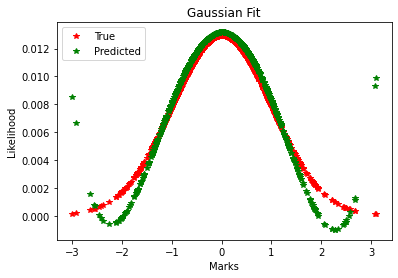

In [ ]:
# Let us fit a fourth degree polynomial

b_0 = beta_0.detach().numpy()
b_1 = beta_1.detach().numpy()
b_2 = beta_2.detach().numpy()
b_3 = beta_3.detach().numpy()
b_4 = beta_4.detach().numpy()

# get plots for training data

ypred = b_0 + b_1 * x_train + b_2 * (x_train**2) + b_3 * (x_train**3) + b_4 * (x_train**4)


plt.plot(x_train, y_train, 'r*'); plt.title("Gaussian Fit"); 

plt.plot(x_train, ypred,  'g*'); plt.title("Gaussian Fit"); 

plt.legend(['True', 'Predicted'])

plt.xlabel('Marks'); plt.ylabel('Likelihood'); plt.show()

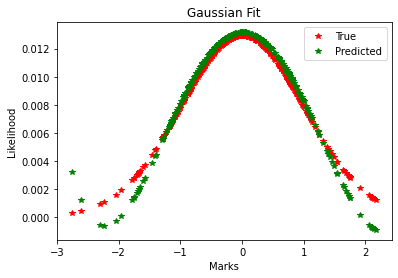

In [ ]:
# get plots for testing data

y_pred = b_0 + b_1 * x_test + b_2 * (x_test**2) + b_3 * (x_test**3) + b_4 * (x_test**4)


plt.plot(x_test, y_test, 'r*'); plt.title("Gaussian Fit"); 

plt.plot(x_test, y_pred,  'g*'); plt.title("Gaussian Fit"); 

plt.legend(['True', 'Predicted'])

plt.xlabel('Marks'); plt.ylabel('Likelihood'); plt.show()